# **Predicting Epileptic Seizures Using EEG Signals**

File Authors: 
*   Saleh Saeed
*   Maha Tunbell



*The project should satisfactorily cover the following aspects:*


*   Dataset analysis and report on important statistics
*   Correlation analysis
*   Dealing with missing values (if applicable)
*   Dealing with imbalanced data (if applicable)
*   List of appropriate evaluation measures with justifications
*   List of classifiers used (with description and justification): It should be more than one preferable 3 or more.
*   Proper hyper-parameter tuning based on separate validation set (or cross-validation if applicable)
*   Error analysis and possible improvements
*   Final results on the test set
*   Conclusions from the work

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data Pre-processing">Data Pre-processing</a></li>
<li><a href="#Training&Validation">Training and Validation</a></li>


> <li><a href="#Training&Validation">Logistic Regression</a></li>
> <li><a href="#SVM">SVM</a></li>
> <li><a href="#Bagging">Bagging</a></li>
> <li><a href="#Random">Random Forest</a></li>




<li><a href="#Testing">Testing</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
<li><a href="#Ref">References</a></li>
</ul>

# **Introduction** 
Epilepsy is a serious neurological condition that affects the brain and nervous system. Seizures 
always start in the brain and are caused by many different reasons such as stroke, brain tumor, and severe head injury. According to some statistics, between 5-10% of people above 80 years 
old have experienced Epileptic Seizures at least once. Epileptic seizures occur due to disorder in brain functionality which can affect patient’s health. Prediction of epileptic seizures before the beginning of the onset is quite useful for preventing the seizure by medication. Machine learning techniques and computational methods are used for predicting epileptic seizures from Electroencephalograms (EEG) signals the figure 1.0 shows how the data is collected.(Epilepsy societ,2021)

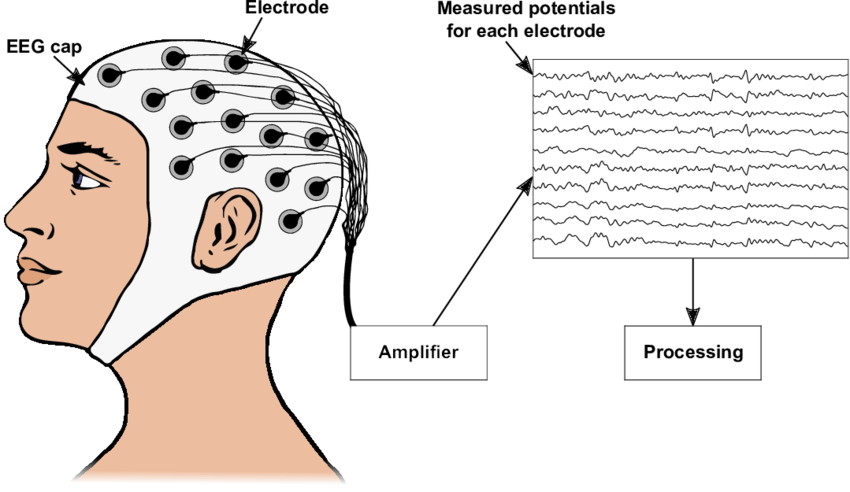

In [ ]:
from IPython.display import Image
Image(filename='EEG.png')

(Figure 1.0,source:Researchgate)


The dataset has 178 EEG features and 2 classes, so it’s a binary class classification problem 
where [Seizure Class =1, Non-Seizure Class = 0], the number of samples is 11500. The dataset is 
attached.

**Project Phases**

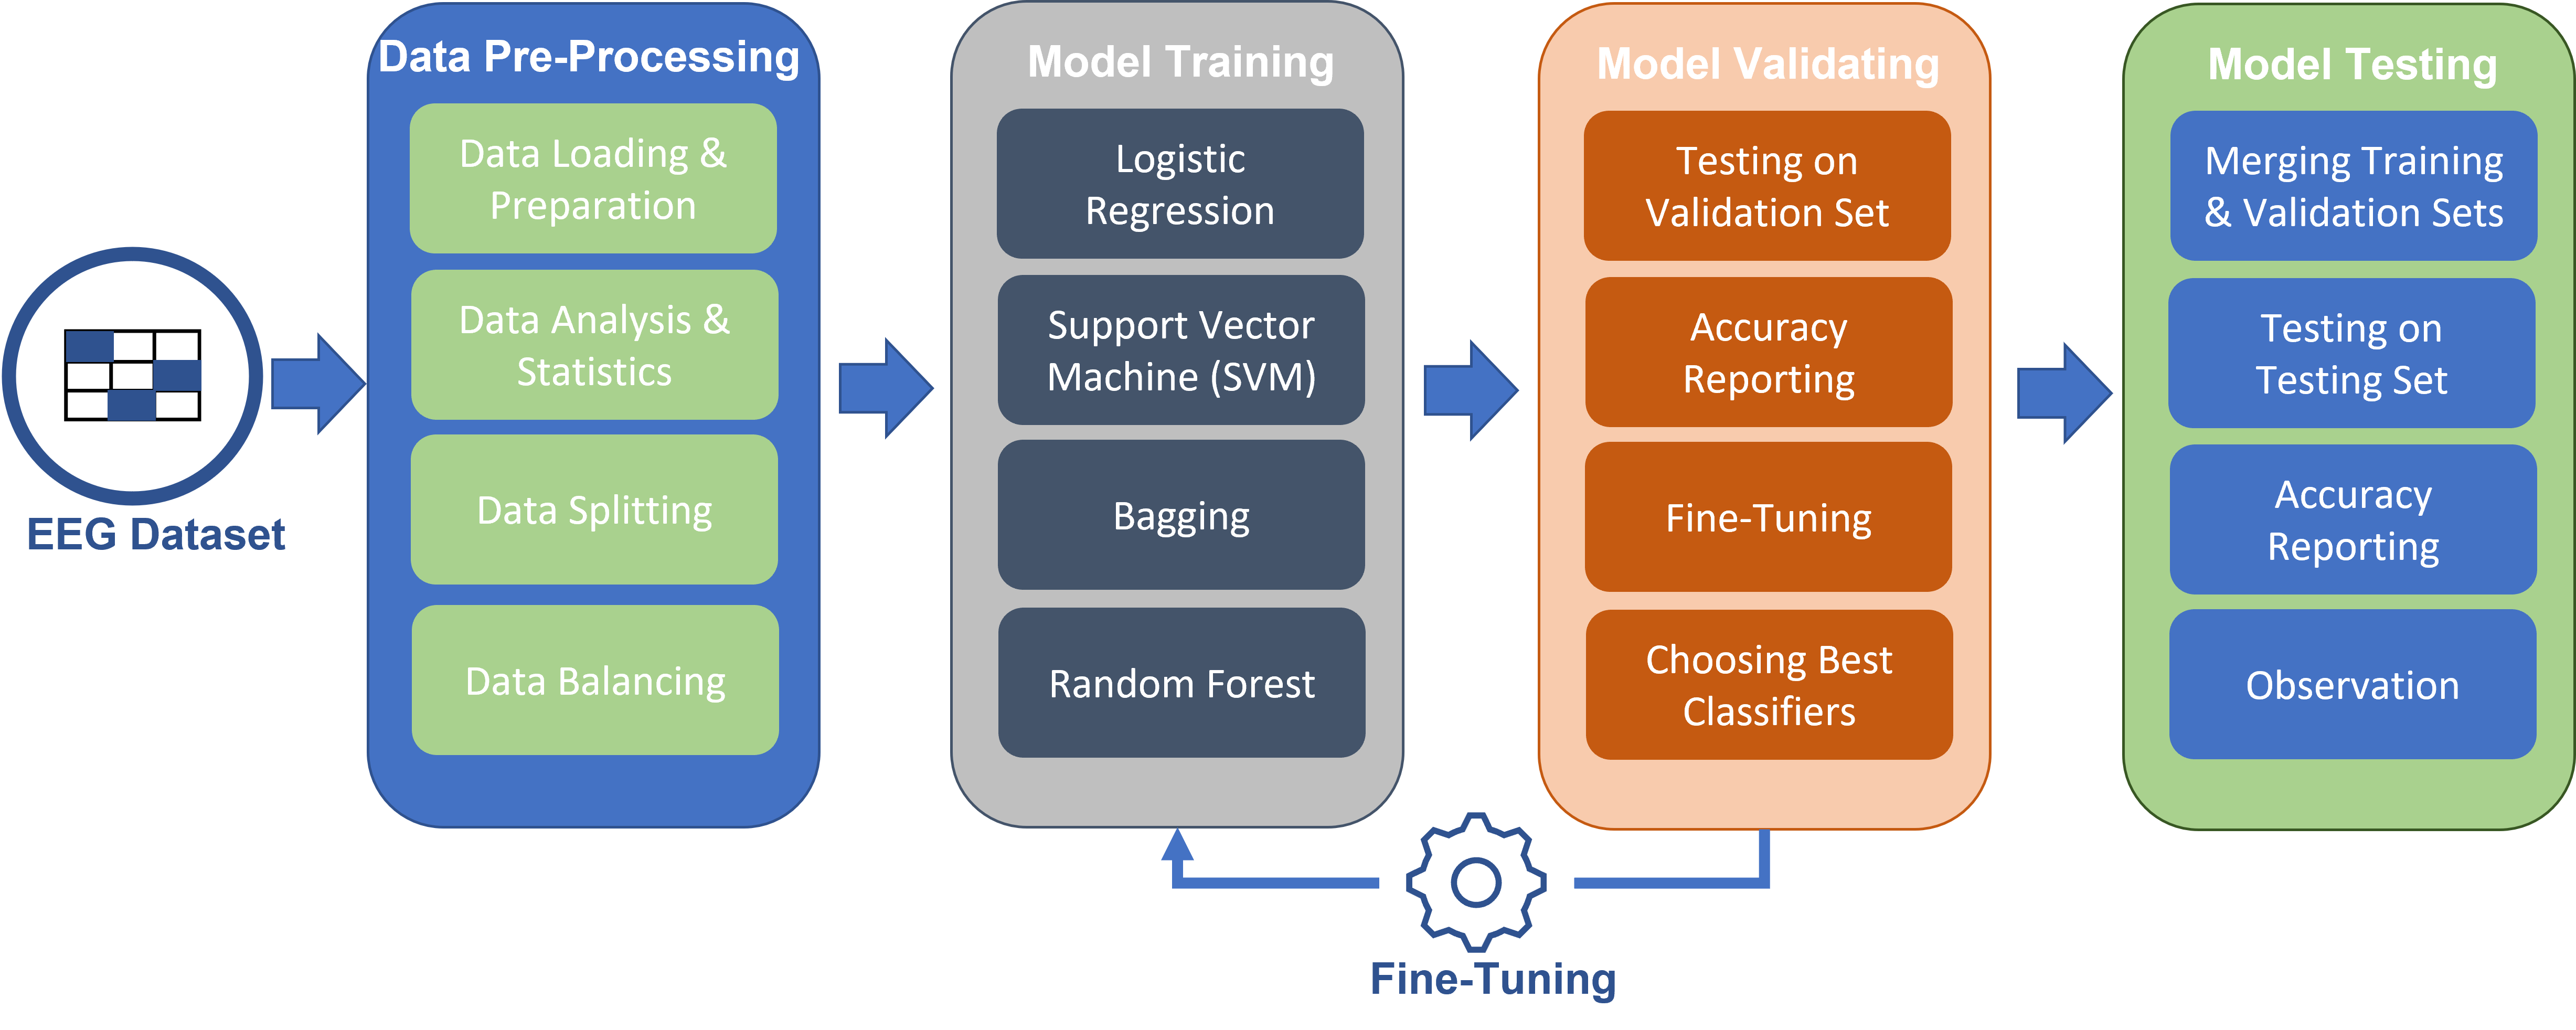

In [ ]:
Image(filename='Picture4.png')

<a id='Data Pre-processing'></a>
# Data Pre-processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
import random
%matplotlib inline


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

from sklearn.metrics import auc
from sklearn.metrics import roc_curve as rc
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import sklearn.metrics

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

import imblearn       #THE VERSION OF IMLEARN IS 0.8.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Loading and Preparing the Dataset

In [ ]:
#Read the dataset 
ESR_DF = pd.read_csv('Epileptic Seizure Recognition.csv')
ESR_DF.info()
ESR_DF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
ESR_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
#Clean missing values & check the dataset
ESR_DF.dropna()
ESR_DF.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

The dataset doesn't contain any missing values 

In [ ]:
#Drop the first column
ESR_DF = ESR_DF.drop(columns=['Unnamed'])

In [ ]:
ESR_DF.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
ESR_DF['y'].value_counts(normalize=False)

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

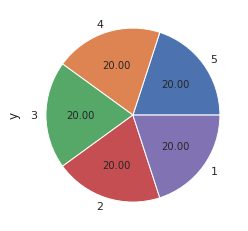

In [ ]:
ESR_DF['y'].value_counts().plot.pie(autopct='%.2f');

In [ ]:
#adjust the labels to y={0,1}
ESR_DF['New_y'] = None
ESR_DF['New_y'] = np.where(ESR_DF['y'] == 1, 1, ESR_DF['New_y'])
ESR_DF['New_y'] = np.where(ESR_DF['y'] == 2, 0, ESR_DF['New_y'])
ESR_DF['New_y'] = np.where(ESR_DF['y'] == 3, 0, ESR_DF['New_y'])
ESR_DF['New_y'] = np.where(ESR_DF['y'] == 4, 0, ESR_DF['New_y'])
ESR_DF['New_y'] = np.where(ESR_DF['y'] == 5, 0, ESR_DF['New_y'])

#Check the values after adjustment
ESR_DF['New_y'].unique()

array([0, 1], dtype=object)

In [ ]:
#Drop the old label column
ESR_DF = ESR_DF.drop(columns=['y'])

In [ ]:
#Rename the 'New_y' column as 'y'
ESR_DF = ESR_DF.rename(columns = {'New_y': 'y'}, inplace = False)

#Check the adjusted dataset
ESR_DF.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


#### Dataset Analysis and Important Statistics

In [ ]:
round(ESR_DF.describe(),2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,...,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00
mean,-11.58,-10.91,-10.19,-9.14,-8.01,-7.00,-6.50,-6.69,-6.56,-6.17,-5.83,-6.04,-6.69,-7.09,-7.21,-7.09,-6.81,-6.74,-6.48,-6.45,-6.36,-6.54,-6.88,-6.88,-6.12,-5.16,-4.79,-4.87,-5.39,-5.94,-6.35,-6.21,-5.86,-5.30,-4.96,-5.28,-6.16,-7.32,-8.00,-7.82,...,-6.28,-7.00,-7.34,-7.91,-8.18,-8.61,-8.58,-8.24,-7.69,-7.36,-7.23,-6.98,-6.76,-6.36,-6.42,-6.47,-6.32,-5.81,-5.26,-4.68,-4.64,-4.77,-5.65,-7.17,-8.76,-9.78,-10.10,-9.84,-9.70,-9.35,-9.50,-10.15,-11.63,-12.94,-13.67,-13.36,-13.05,-12.71,-12.43,-12.20
std,165.63,166.06,163.52,161.27,161.00,161.33,161.47,162.12,162.03,160.44,160.47,161.18,165.07,169.20,170.64,168.93,164.65,162.06,162.57,162.34,162.82,163.91,165.84,166.01,164.72,162.77,162.90,164.80,165.39,164.29,163.17,163.41,163.56,162.55,160.81,160.44,162.88,166.24,166.31,164.51,...,168.02,168.57,168.66,167.64,167.41,167.92,168.27,167.81,166.74,165.68,167.13,168.16,167.46,165.06,164.25,166.23,168.14,167.07,166.45,167.55,169.42,170.64,170.82,168.15,166.82,167.00,167.76,166.99,167.06,166.61,165.24,164.65,166.15,168.55,168.56,167.26,164.24,162.90,162.89,164.85
min,-1839.00,-1838.00,-1835.00,-1845.00,-1791.00,-1757.00,-1832.00,-1778.00,-1840.00,-1867.00,-1765.00,-1803.00,-1833.00,-1867.00,-1870.00,-1839.00,-1867.00,-1856.00,-1844.00,-1717.00,-1764.00,-1856.00,-1844.00,-1866.00,-1863.00,-1866.00,-1781.00,-1860.00,-1818.00,-1867.00,-1743.00,-1517.00,-1552.00,-1720.00,-1864.00,-1814.00,-1829.00,-1851.00,-1840.00,-1673.00,...,-1857.00,-1867.00,-1826.00,-1866.00,-1854.00,-1789.00,-1872.00,-1866.00,-1675.00,-1778.00,-1733.00,-1862.00,-1861.00,-1857.00,-1839.00,-1860.00,-1843.00,-1863.00,-1861.00,-1845.00,-1820.00,-1864.00,-1868.00,-1855.00,-1852.00,-1870.00,-1847.00,-1578.00,-1838.00,-1763.00,-1860.00,-1867.00,-1865.00,-1642.00,-1723.00,-1866.00,-1863.00,-1781.00,-1727.00,-1829.00
25%,-54.00,-55.00,-54.00,-54.00,-54.00,-54.00,-54.00,-55.00,-55.00,-54.00,-54.00,-54.00,-54.00,-54.00,-53.00,-53.00,-53.00,-52.00,-53.00,-53.00,-53.00,-53.00,-53.00,-52.00,-52.00,-52.00,-51.00,-50.00,-50.00,-50.00,-51.00,-52.00,-52.00,-51.00,-51.00,-51.00,-51.00,-51.00,-52.00,-52.00,...,-53.00,-54.00,-55.00,-55.00,-56.00,-56.00,-56.00,-55.00,-57.00,-55.00,-55.00,-54.00,-54.00,-53.00,-53.00,-53.00,-52.00,-52.25,-52.00,-52.00,-53.00,-52.00,-52.00,-52.00,-53.00,-54.00,-54.00,-55.00,-55.00,-55.00,-55.00,-55.00,-56.00,-56.00,-56.00,-55.00,-56.00,-55.00,-55.00,-55.00
50%,-8.00,-8.00,-7.00,-8.00,-8.00,-8.00,-8.00,-8.00,-7.00,-7.00,-8.00,-8.00,-8.00,-8.00,-7.00,-7.00,-6.00,-7.00,-6.00,-6.00,-7.00,-6.00,-6.00,-7.00,-7.00,-6.00,-6.00,-6.00,-5.00,-5.00,-5.00,-6.00,-6.00,-6.00,-6.00,-6.00,-6.00,-6.00,-7.00,-7.00,...,-7.00,-7.00,-8.00,-8.00,-8.00,-8.00,-8.00,-8.00,-9.00,-9.00,-9.00,-8.00,-8.00,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,-6.00,-7.00,-7.00,-7.00,-8.00,-8.00,-9.00,-9.00,-8.00,-8.00,-9.00,-10.00,-10.00,-10.00,-10.00,-9.00,-9.00,-9.00,-9.00
75%,34.00,35.00,36.00,36.00,35.00,36.00,35.00,36.00,36.0

In [ ]:
ESR_DF['y'].value_counts(normalize=False)

0    9200
1    2300
Name: y, dtype: int64

In [ ]:
ESR_DF['y'].value_counts(normalize=True)

0    0.8
1    0.2
Name: y, dtype: float64

Class Distribution

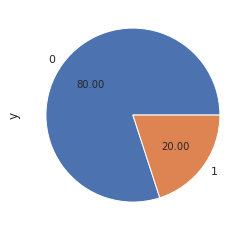

In [ ]:
ESR_DF['y'].value_counts().plot.pie(autopct='%.2f');

In [ ]:
correlations = ESR_DF.corr()

We can see no strong relationship between the label and the features that means no feature is dominant, the table below shows this in heatmap:

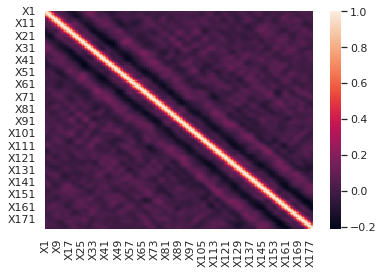

In [ ]:
sns.heatmap(correlations)
plt.show()

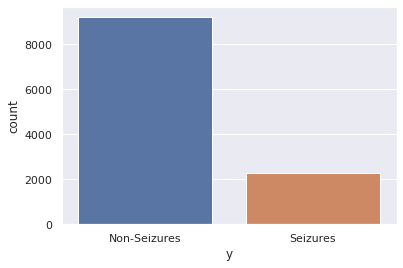

In [ ]:
Barchar = sns.countplot(ESR_DF['y'])
Barchar.set_xticklabels(['Non-Seizures','Seizures'])
plt.show()

#### Splitting the dataset into Training, Validation and Testing

In [ ]:
#TO SPLIT THE DATA INTO INDEPENDENT VARIABLES (X) AND LABELS (y)
X=ESR_DF.iloc[:, :-1].values
y=ESR_DF.iloc[:, 178].values

In [ ]:
# Split the data 70% for Training, 15% Validation and 15% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=777, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=777,stratify=y_test)

In [ ]:
#TO SEE THE SIZE OF EACH DATASET AND THE PERCENTAGE OF EACH CLASS IN IT 
print('X_train={}, X_val={}, X_test={}'.format(X_train.shape, X_val.shape, X_test.shape))
print('y_train={}, y_val={}, y_test={}'.format(y_train.shape, y_val.shape, y_test.shape),"\n")
print('class % in y_train = {}'.format((np.unique(y_train, return_counts=True)[1]/y_train.shape[0]).round(2)))
print('class % in y_val = {}'.format((np.unique(y_val, return_counts=True)[1]/y_val.shape[0]).round(2)))
print('class % in y_test = {}'.format((np.unique(y_test, return_counts=True)[1]/y_test.shape[0]).round(2)))

X_train=(8049, 178), X_val=(1726, 178), X_test=(1725, 178)
y_train=(8049,), y_val=(1726,), y_test=(1725,) 

class % in y_train = [0.8 0.2]
class % in y_val = [0.8 0.2]
class % in y_test = [0.8 0.2]


In [ ]:
#Label data type is changed to int
y_train=y_train.astype('int64')
y_val=y_val.astype('int64')
y_test=y_test.astype('int64')
print('Y Type for Training', y_train.astype , '\nY Type for Validation', y_val.astype)

Y Type for Training <built-in method astype of numpy.ndarray object at 0x7f05310da4e0> 
Y Type for Validation <built-in method astype of numpy.ndarray object at 0x7f05310fdda0>


**Visualize the Training Set**

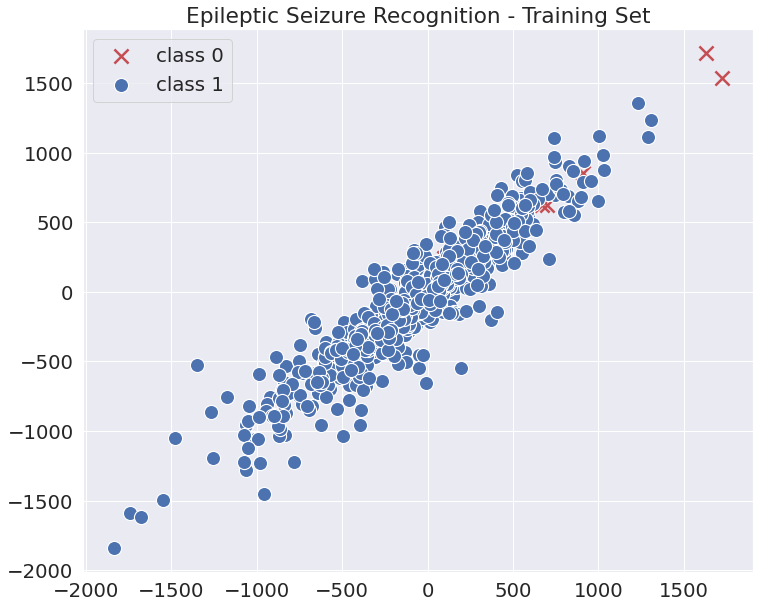

In [ ]:
sns.set_context("paper")
sns.set(font_scale=1.8)
plt.figure(figsize=(12,10))

X_train_1 = X_train[np.where(y_train==1)[0]]
X_train_0 = X_train[np.where(y_train==0)[0]]
sns.scatterplot(X_train_0[:,0], X_train_0[:,1], linewidth=2.5, marker='x', s=200, color='r', zorder=2, label='class 0')
sns.scatterplot(X_train_1[:,0], X_train_1[:,1], marker='o', s=200, color='b', zorder=2, label='class 1')
plt.title('Epileptic Seizure Recognition - Training Set');

**Visualize the Validation Set**

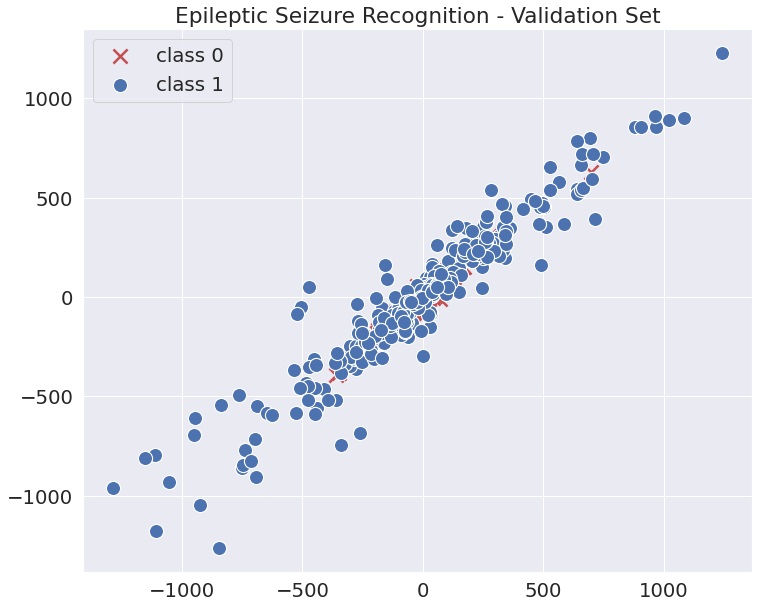

In [ ]:
sns.set_context("paper")
sns.set(font_scale=1.8)
plt.figure(figsize=(12,10))

X_val_1 = X_val[np.where(y_val==1)[0]]
X_val_0 = X_val[np.where(y_val==0)[0]]
sns.scatterplot(X_val_0[:,0], X_val_0[:,1], linewidth=2.5, marker='x', s=200, color='r', zorder=2, label='class 0')
sns.scatterplot(X_val_1 [:,0], X_val_1 [:,1], marker='o', s=200, color='b', zorder=2, label='class 1')
plt.title('Epileptic Seizure Recognition - Validation Set');

**Visualize the Training Set**

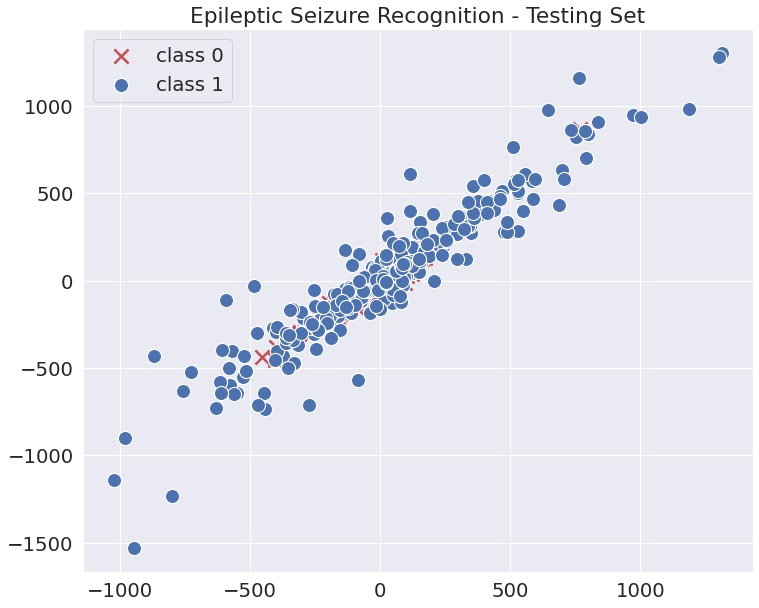

In [ ]:
sns.set_context("paper")
sns.set(font_scale=1.8)
plt.figure(figsize=(12,10))

X_test_1 = X_test[np.where(y_test==1)[0]]
X_test_0 = X_test[np.where(y_test==0)[0]]
sns.scatterplot(X_test_0[:,0], X_test_0[:,1], linewidth=2.5, marker='x', s=200, color='r', zorder=2, label='class 0')
sns.scatterplot(X_test_1 [:,0], X_test_1 [:,1], marker='o', s=200, color='b', zorder=2, label='class 1')
plt.title('Epileptic Seizure Recognition - Testing Set');

#### Balancing the Dataset 

##### SMOTE Oversampling

[6439 6439]


([<matplotlib.patches.Wedge at 0x7f0524d59b90>,
 [Text(6.735557395310444e-17, 1.1, 'Non-Seizures'),
  Text(-2.0206672185931328e-16, -1.1, 'Seizures')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

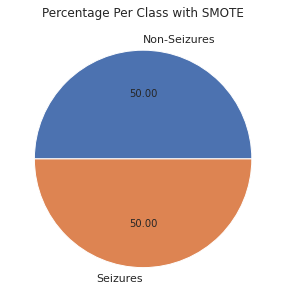

In [ ]:
#LET'S TRY TO SOLVE THE ISSUE OF IMPLABACED DATA BY SMOTE 
sm = SMOTE()
X_train_sm,y_train_sm= sm.fit_resample(X_train,y_train)
print(np.bincount(y_train_sm))
fig = plt.figure(figsize =(8, 5))
plt.title('Percentage Per Class with SMOTE')
plt.pie(np.bincount(y_train_sm), labels = ['Non-Seizures','Seizures'],autopct='%.2f')

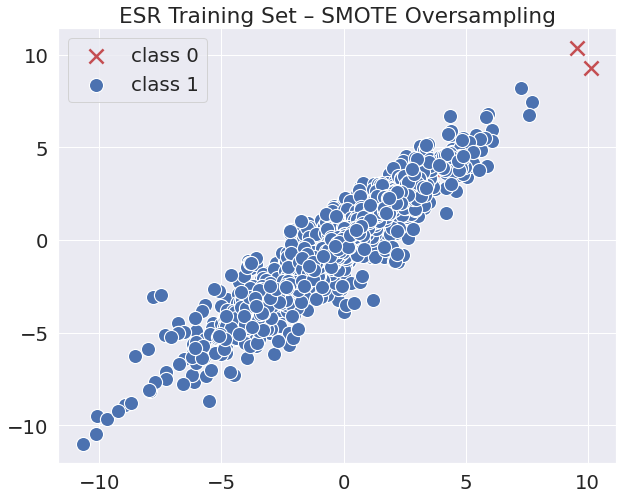

In [ ]:
sns.set_context("paper")
sns.set(font_scale=1.8)
plt.figure(figsize=(10,8))

X_sm_1 = X_train_sm[np.where(y_train_sm==1)[0]]
X_sm_0 = X_train_sm[np.where(y_train_sm==0)[0]]
sns.scatterplot(X_sm_0[:,0], X_sm_0[:,1], linewidth=2.5, marker='x', s=200, color='r', zorder=2, label='class 0')
sns.scatterplot(X_sm_1 [:,0], X_sm_1 [:,1], marker='o', s=200, color='b', zorder=2, label='class 1')
plt.title('ESR Training Set – SMOTE Oversampling');


##### Random Oversampling

[6439 6439]


([<matplotlib.patches.Wedge at 0x7fc57b478790>,
 [Text(6.735557395310444e-17, 1.1, 'Non-Seizures'),
  Text(-2.0206672185931328e-16, -1.1, 'Seizures')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

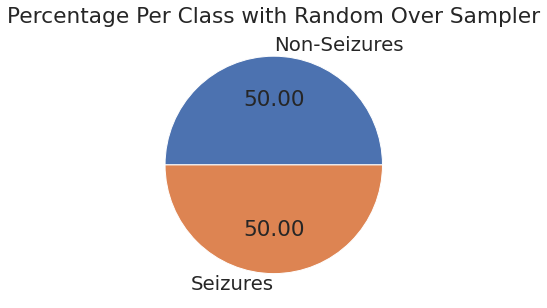

In [ ]:
#LET'S TRY TO SOLVE THE ISSUE OF IMPLABACED DATA BY Random Over Sampler
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
print(np.bincount(y_train_ros))
fig = plt.figure(figsize =(8, 5))
plt.title('Percentage Per Class with Random Over Sampler')
plt.pie(np.bincount(y_train_ros), labels = ['Non-Seizures','Seizures'],autopct='%.2f')

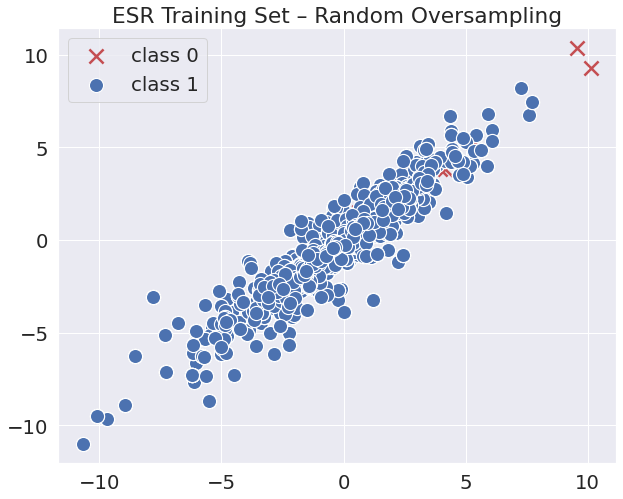

In [ ]:
sns.set_context("paper")
sns.set(font_scale=1.8)
plt.figure(figsize=(10,8))

X_ros_1 = X_train_ros[np.where(y_train_ros==1)[0]]
X_ros_0 = X_train_ros[np.where(y_train_ros==0)[0]]
sns.scatterplot(X_ros_0[:,0], X_ros_0[:,1], linewidth=2.5, marker='x', s=200, color='r', zorder=2, label='class 0')
sns.scatterplot(X_ros_1 [:,0], X_ros_1 [:,1], marker='o', s=200, color='b', zorder=2, label='class 1')
plt.title('ESR Training Set – Random Oversampling');


##### Random Undersampling

[1610 1610]


([<matplotlib.patches.Wedge at 0x7fc57b0c8290>,
 [Text(6.735557395310444e-17, 1.1, 'Non-Seizures'),
  Text(-2.0206672185931328e-16, -1.1, 'Seizures')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

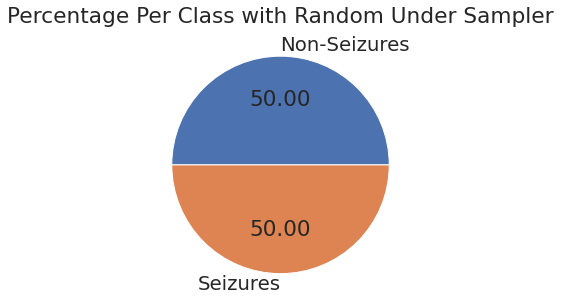

In [ ]:
#LET'S TRY TO SOLVE THE ISSUE OF IMPLABACED DATA BY Random Under Sampler
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
print(np.bincount(y_train_rus))
fig = plt.figure(figsize =(8, 5))
plt.title('Percentage Per Class with Random Under Sampler')
plt.pie(np.bincount(y_train_rus), labels = ['Non-Seizures','Seizures'],autopct='%.2f')

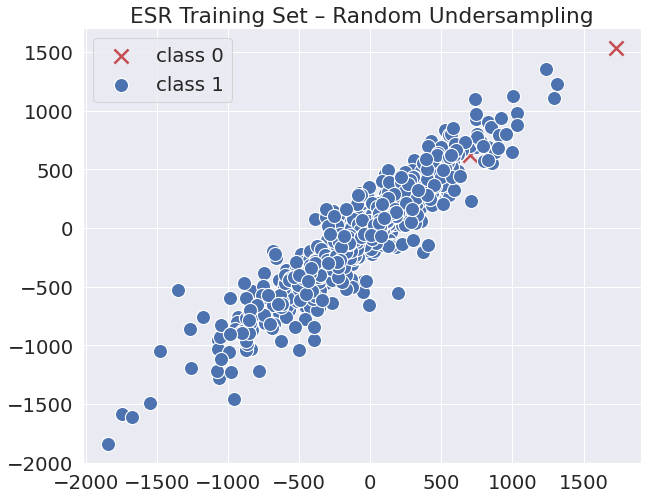

In [ ]:
sns.set_context("paper")
sns.set(font_scale=1.8)
plt.figure(figsize=(10,8))

X_rus_1 = X_train_rus[np.where(y_train_rus==1)[0]]
X_rus_0 = X_train_rus[np.where(y_train_rus==0)[0]]
sns.scatterplot(X_rus_0[:,0], X_rus_0[:,1], linewidth=2.5, marker='x', s=200, color='r', zorder=2, label='class 0')
sns.scatterplot(X_rus_1 [:,0], X_rus_1 [:,1], marker='o', s=200, color='b', zorder=2, label='class 1')
plt.title('ESR Training Set – Random Undersampling');

<a id='Training&Validation'></a>
# **Training and Validation**

# **Model:** Logistic Regression 

In [ ]:
#Setting the Polynomial Features with 2nd degree 
poly = PolynomialFeatures(degree=2, include_bias=False)

#Setting the classifier with the appropriate hyperparameters
LR_clf = LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight= dict, random_state=20211008, solver='saga', max_iter=200)

##### Imbalanced Data 

Performance on Training Set: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      6439
           1       0.99      0.81      0.89      1610

    accuracy                           0.96      8049
   macro avg       0.97      0.90      0.93      8049
weighted avg       0.96      0.96      0.96      8049



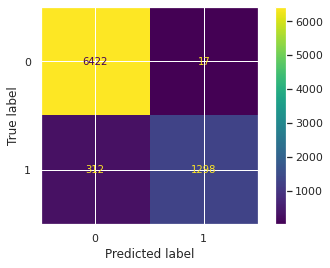


Performance on Validation Set: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1381
           1       0.97      0.78      0.86       345

    accuracy                           0.95      1726
   macro avg       0.96      0.89      0.92      1726
weighted avg       0.95      0.95      0.95      1726



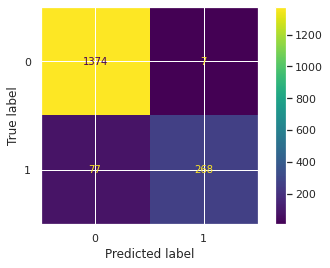

In [ ]:
#Training and Validation

# apply PolynomialFeatures
X_train_poly = poly.fit_transform(X_train) 
X_val_poly = poly.fit_transform(X_val)

#Scale the data 
scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_poly = scaler.transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

#Fit the model
LR_clf.fit(X_train_poly, y_train)

#Make Predictions
y_pred_on_train = LR_clf.predict(X_train_poly)
y_pred_on_val = LR_clf.predict(X_val_poly)

#Performance
print('Performance on Training Set: \n',classification_report(y_true=y_train, y_pred=y_pred_on_train))
plot_confusion_matrix(LR_clf, X_train_poly, y_train)
plt.show()

print('\nPerformance on Validation Set: \n', classification_report(y_true=y_val, y_pred=y_pred_on_val))
plot_confusion_matrix(LR_clf, X_val_poly, y_val)
plt.show()

##### SMOTE Oversampling

Performance on Training Set: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      6439
           1       0.99      0.79      0.88      6439

    accuracy                           0.89     12878
   macro avg       0.91      0.89      0.89     12878
weighted avg       0.91      0.89      0.89     12878



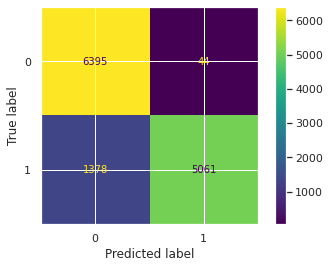


Performance on Validation Set: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1381
           1       0.94      0.74      0.83       345

    accuracy                           0.94      1726
   macro avg       0.94      0.86      0.90      1726
weighted avg       0.94      0.94      0.94      1726



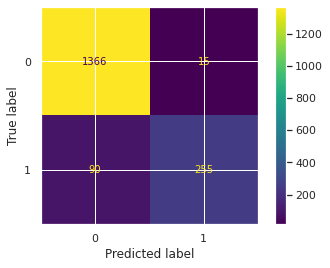

In [ ]:
#Training and Validation

# apply PolynomialFeatures
X_train_poly = poly.fit_transform(X_train_sm) 
X_val_poly = poly.fit_transform(X_val)

#Scale the data 
scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_poly = scaler.transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

#Fit the model
LR_clf.fit(X_train_poly, y_train_sm)

#Make Predictions
y_pred_on_train = LR_clf.predict(X_train_poly)
y_pred_on_val = LR_clf.predict(X_val_poly)

#Performance
print('Performance on Training Set: \n',classification_report(y_true=y_train_sm, y_pred=y_pred_on_train))
plot_confusion_matrix(LR_clf, X_train_poly, y_train_sm)
plt.show()

print('\nPerformance on Validation Set: \n', classification_report(y_true=y_val, y_pred=y_pred_on_val))
plot_confusion_matrix(LR_clf, X_val_poly, y_val)
plt.show()

##### Random Oversampling 

Performance on Training Set: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      6439
           1       0.99      0.84      0.91      6439

    accuracy                           0.92     12878
   macro avg       0.93      0.92      0.92     12878
weighted avg       0.93      0.92      0.92     12878



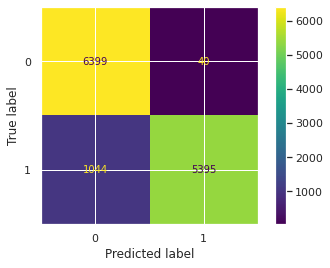


Performance on Validation Set: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1381
           1       0.96      0.71      0.82       345

    accuracy                           0.94      1726
   macro avg       0.95      0.85      0.89      1726
weighted avg       0.94      0.94      0.93      1726



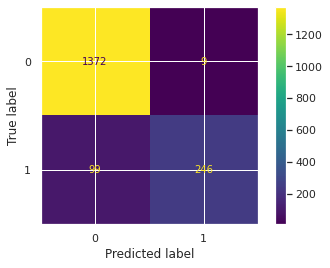

In [ ]:
#Training and Validation

# apply PolynomialFeatures
X_train_poly = poly.fit_transform(X_train_ros) 
X_val_poly = poly.fit_transform(X_val)

#Scale the data 
scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_poly = scaler.transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

#Fit the model
LR_clf.fit(X_train_poly, y_train_ros)

#Make Predictions
y_pred_on_train = LR_clf.predict(X_train_poly)
y_pred_on_val = LR_clf.predict(X_val_poly)

#Performance
print('Performance on Training Set: \n',classification_report(y_true=y_train_ros, y_pred=y_pred_on_train))
plot_confusion_matrix(LR_clf, X_train_poly, y_train_ros)
plt.show()

print('\nPerformance on Validation Set: \n', classification_report(y_true=y_val, y_pred=y_pred_on_val))
plot_confusion_matrix(LR_clf, X_val_poly, y_val)
plt.show()

##### Random Undersampling 

Performance on Training Set: 
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      1610
           1       0.99      0.75      0.85      1610

    accuracy                           0.87      3220
   macro avg       0.89      0.87      0.87      3220
weighted avg       0.89      0.87      0.87      3220



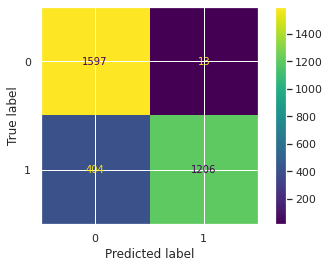


Performance on Validation Set: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      1381
           1       0.93      0.66      0.77       345

    accuracy                           0.92      1726
   macro avg       0.93      0.83      0.86      1726
weighted avg       0.92      0.92      0.92      1726



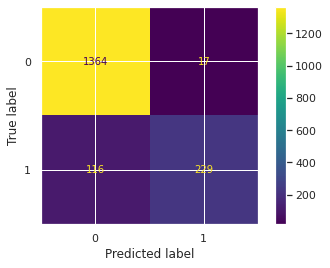

In [ ]:
#Training and Validation

# apply PolynomialFeatures
X_train_poly = poly.fit_transform(X_train_rus) 
X_val_poly = poly.fit_transform(X_val)

#Scale the data 
scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_poly = scaler.transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

#Fit the model
LR_clf.fit(X_train_poly, y_train_rus)

#Make Predictions
y_pred_on_train = LR_clf.predict(X_train_poly)
y_pred_on_val = LR_clf.predict(X_val_poly)

#Performance
print('Performance on Training Set: \n',classification_report(y_true=y_train_rus, y_pred=y_pred_on_train))
plot_confusion_matrix(LR_clf, X_train_poly, y_train_rus)
plt.show()

print('\nPerformance on Validation Set: \n', classification_report(y_true=y_val, y_pred=y_pred_on_val))
plot_confusion_matrix(LR_clf, X_val_poly, y_val)
plt.show()

<a id='SVM'></a>
# **Model:** Linear Support Vector Machines (SVM)

### Due to high dimensionality dataset linear kernal is not suitable so we will try the Polynomial and RBF kernal 

##A: Polynomial kernel

In [ ]:
# Trying polynomial on Original data with different degrees 
degrees_list = [1, 2, 3, 4, 5, 6, 8, 9, 10]
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_val)
X_train= scaler.transform(X_train)
X_val= scaler.transform(X_val)
for degree_val in degrees_list:
    clf_P = SVC(kernel='poly', degree=degree_val)
    clf_P.fit(X_train, y_train)
    y_pred = clf_P.predict(X_val)
    print("The Accuracy for polynomial Classifier is:",sklearn.metrics.accuracy_score(y_val, y_pred), "Degree: ",degree_val,"on Original Data") 

The Accuracy for polynomial Classifier is: 0.8140208574739282 Degree:  1 on Original Data
The Accuracy for polynomial Classifier is: 0.958864426419467 Degree:  2 on Original Data
The Accuracy for polynomial Classifier is: 0.8603707995365005 Degree:  3 on Original Data
The Accuracy for polynomial Classifier is: 0.9426419466975666 Degree:  4 on Original Data
The Accuracy for polynomial Classifier is: 0.8522595596755504 Degree:  5 on Original Data
The Accuracy for polynomial Classifier is: 0.9206257242178447 Degree:  6 on Original Data
The Accuracy for polynomial Classifier is: 0.9107763615295481 Degree:  8 on Original Data
The Accuracy for polynomial Classifier is: 0.847045191193511 Degree:  9 on Original Data
The Accuracy for polynomial Classifier is: 0.9038238702201622 Degree:  10 on Original Data


Accuracy on Training 0.9744067586035532
Accuracy on Validation 0.958864426419467
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1381
           1       0.97      0.82      0.89       345

    accuracy                           0.96      1726
   macro avg       0.96      0.91      0.93      1726
weighted avg       0.96      0.96      0.96      1726



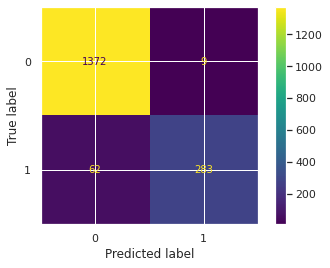

In [ ]:
# Since 2 degree has the best accuracy 
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_val)
clf_P = SVC(kernel='poly', degree=2)
clf_P.fit(X_train, y_train)
y_pred = clf_P.predict(X_val) 
print ("Accuracy on Training", clf_P.score(X_train,y_train))
print ("Accuracy on Validation", clf_P.score(X_val,y_val))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_P, X_val, y_val)
plt.show()

In [ ]:
# Trying polynomial on processed data using SMOTE 
degrees_list = [1, 2, 3, 4, 5, 6, 8, 9, 10]
scaler = StandardScaler()
scaler.fit(X_train_sm)
scaler.fit(X_val)
X_train= scaler.transform(X_train_sm)
X_val= scaler.transform(X_val)
for degree_val in degrees_list:
    clf_P = SVC(kernel='poly', degree=degree_val)
    clf_P.fit(X_train_sm, y_train_sm)
    y_pred = clf_P.predict(X_val)
    print("The Accuracy for polynomial Classifier is:",sklearn.metrics.accuracy_score(y_val, y_pred), "Degree: ",degree_val, "on SMOTE") 

The Accuracy for polynomial Classifier is: 0.8499420625724218 Degree:  1 on SMOTE
The Accuracy for polynomial Classifier is: 0.9710312862108922 Degree:  2 on SMOTE
The Accuracy for polynomial Classifier is: 0.8684820393974507 Degree:  3 on SMOTE
The Accuracy for polynomial Classifier is: 0.9414831981460023 Degree:  4 on SMOTE
The Accuracy for polynomial Classifier is: 0.8551564310544612 Degree:  5 on SMOTE
The Accuracy for polynomial Classifier is: 0.9159907300115875 Degree:  6 on SMOTE
The Accuracy for polynomial Classifier is: 0.9061413673232909 Degree:  8 on SMOTE
The Accuracy for polynomial Classifier is: 0.8511008111239861 Degree:  9 on SMOTE
The Accuracy for polynomial Classifier is: 0.8974507531865585 Degree:  10 on SMOTE


Accuracy on Training 0.947817984159031
Accuracy on Validation 0.9710312862108922
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1381
           1       0.93      0.93      0.93       345

    accuracy                           0.97      1726
   macro avg       0.95      0.95      0.95      1726
weighted avg       0.97      0.97      0.97      1726



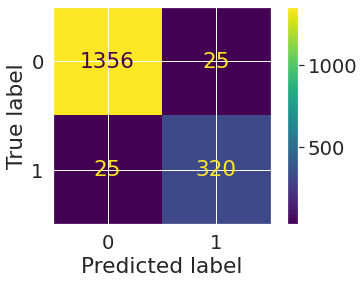

In [ ]:
# Since 2 degree has the best accuracy 
scaler = StandardScaler()
scaler.fit(X_train_sm)
scaler.fit(X_val)
clf_P = SVC(kernel='poly', degree=2)
clf_P.fit(X_train_sm, y_train_sm)
y_pred = clf_P.predict(X_val) 
print ("Accuracy on Training", clf_P.score(X_train_sm,y_train_sm))
print ("Accuracy on Validation", clf_P.score(X_val,y_val))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_P, X_val, y_val)
plt.show()

In [ ]:
# Trying polynomial on processed data using Random Over Sampling   
degrees_list = [1, 2, 3, 4, 5, 6, 8, 9, 10]
scaler = StandardScaler()
scaler.fit(X_train_ros)
scaler.fit(X_val)
X_train= scaler.transform(X_train_ros)
X_val= scaler.transform(X_val)
for degree_val in degrees_list:
    clf_P = SVC(kernel='poly', degree=degree_val)
    clf_P.fit(X_train_ros, y_train_ros)
    y_pred = clf_P.predict(X_val)
    print("The Accuracy for polynomial Classifier is:",sklearn.metrics.accuracy_score(y_val, y_pred), "Degree: ",degree_val,"Random Over Sampling") 

The Accuracy for polynomial Classifier is: 0.8476245654692932 Degree:  1 Random Over Sampling
The Accuracy for polynomial Classifier is: 0.9669756662804172 Degree:  2 Random Over Sampling
The Accuracy for polynomial Classifier is: 0.8539976825028969 Degree:  3 Random Over Sampling
The Accuracy for polynomial Classifier is: 0.9223638470451911 Degree:  4 Random Over Sampling
The Accuracy for polynomial Classifier is: 0.8441483198146003 Degree:  5 Random Over Sampling
The Accuracy for polynomial Classifier is: 0.8974507531865585 Degree:  6 Random Over Sampling
The Accuracy for polynomial Classifier is: 0.8829663962920047 Degree:  8 Random Over Sampling
The Accuracy for polynomial Classifier is: 0.8377752027809965 Degree:  9 Random Over Sampling
The Accuracy for polynomial Classifier is: 0.8702201622247973 Degree:  10 Random Over Sampling


Accuracy on Training 0.9537195216648547
Accuracy on Validation 0.9669756662804172
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.94      0.89      0.92       345

    accuracy                           0.97      1726
   macro avg       0.96      0.94      0.95      1726
weighted avg       0.97      0.97      0.97      1726



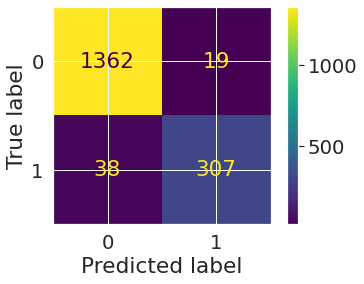

In [ ]:
# Since 2 degree has the best accuracy 
scaler = StandardScaler()
scaler.fit(X_train_ros)
scaler.fit(X_val)
clf_P = SVC(kernel='poly', degree=2)
clf_P.fit(X_train_ros, y_train_ros)
y_pred = clf_P.predict(X_val) 
print ("Accuracy on Training", clf_P.score(X_train_ros,y_train_ros))
print ("Accuracy on Validation", clf_P.score(X_val,y_val))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_P, X_val, y_val)
plt.show()

In [ ]:
# Trying polynomial on processed data using Random Under Sampling 
degrees_list = [1, 2, 3, 4, 5, 6, 8, 9, 10]
scaler = StandardScaler()
scaler.fit(X_train_rus)
scaler.fit(X_val)
X_train= scaler.transform(X_train_rus)
X_val= scaler.transform(X_val)
for degree_val in degrees_list:
    clf_P = SVC(kernel='poly', degree=degree_val)
    clf_P.fit(X_train_rus, y_train_rus)
    y_pred = clf_P.predict(X_val)
    print("The Accuracy for polynomial kernal is:",sklearn.metrics.accuracy_score(y_val, y_pred), "Degree: ",degree_val,"Random Under Sampling") 

The Accuracy for polynomial kernal is: 0.8453070683661645 Degree:  1 Random Under Sampling
The Accuracy for polynomial kernal is: 0.9571263035921205 Degree:  2 Random Under Sampling
The Accuracy for polynomial kernal is: 0.8418308227114716 Degree:  3 Random Under Sampling
The Accuracy for polynomial kernal is: 0.9107763615295481 Degree:  4 Random Under Sampling
The Accuracy for polynomial kernal is: 0.8366164542294322 Degree:  5 Random Under Sampling
The Accuracy for polynomial kernal is: 0.8893395133256083 Degree:  6 Random Under Sampling
The Accuracy for polynomial kernal is: 0.8736964078794901 Degree:  8 Random Under Sampling
The Accuracy for polynomial kernal is: 0.8354577056778679 Degree:  9 Random Under Sampling
The Accuracy for polynomial kernal is: 0.8632676709154113 Degree:  10 Random Under Sampling


Accuracy on Training 0.9164596273291925
Accuracy on Validation 0.9571263035921205
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1381
           1       0.94      0.84      0.89       345

    accuracy                           0.96      1726
   macro avg       0.95      0.91      0.93      1726
weighted avg       0.96      0.96      0.96      1726



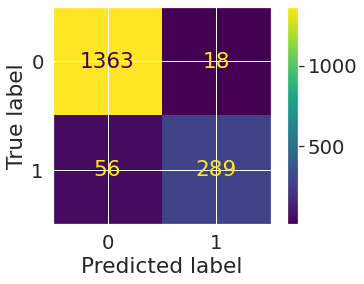

In [ ]:
# Since 2 degree has the best accuracy 
scaler = StandardScaler()
scaler.fit(X_train_rus)
scaler.fit(X_val)
clf_P = SVC(kernel='poly', degree=2)
clf_P.fit(X_train_rus, y_train_rus)
y_pred = clf_P.predict(X_val) 
print ("Accuracy on Training", clf_P.score(X_train_rus,y_train_rus))
print ("Accuracy on Validation", clf_P.score(X_val,y_val))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_P, X_val, y_val)
plt.show()

## B: RBF kernel

RBF Accuracy on Training 0.9827307740091937
 RBF Accuracy on Validation: 0.9733487833140209
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1381
           1       0.91      0.96      0.94       345

    accuracy                           0.97      1726
   macro avg       0.95      0.97      0.96      1726
weighted avg       0.97      0.97      0.97      1726



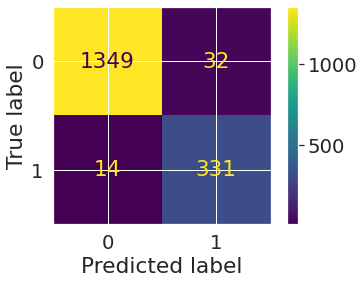

In [ ]:
# Trying RBF on Original 
scaler.fit(X_train)
scaler.fit(X_val)
X_train= scaler.transform(X_train)
X_val= scaler.transform(X_val)
clf_R = SVC(kernel='rbf',class_weight='balanced', gamma='scale')
clf_R.fit(X_train, y_train)
y_pred = clf_R.predict(X_val)
print ("RBF Accuracy on Training", clf_R.score(X_train,y_train))
print(" RBF Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_R, X_val, y_val)
plt.show()

RBF Accuracy on Training 0.9706476160894549
  RBF Accuracy on Validation: 0.9698725376593279 on SMOTE
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1381
           1       0.89      0.97      0.93       345

    accuracy                           0.97      1726
   macro avg       0.94      0.97      0.95      1726
weighted avg       0.97      0.97      0.97      1726



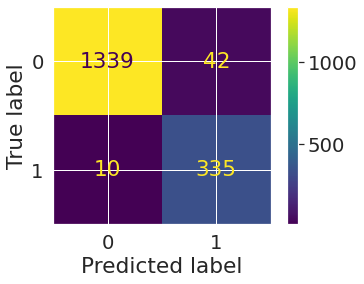

In [ ]:
# Trying polynomial on SMOTE
scaler.fit(X_train_sm)
scaler.fit(X_val)
X_train= scaler.transform(X_train_sm)
X_val= scaler.transform(X_val)
clf_R = SVC(kernel='rbf',class_weight='balanced', gamma='scale')
clf_R.fit(X_train_sm, y_train_sm)
y_pred = clf_R.predict(X_val)
print ("RBF Accuracy on Training", clf_R.score(X_train_sm,y_train_sm))
print("  RBF Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred),"on SMOTE")
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_R, X_val, y_val)
plt.show()

RBF Accuracy on Training 0.9780245379717347
RBF Accuracy on Validation: 0.9716106604866744 on Random over Sampled data
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1381
           1       0.91      0.95      0.93       345

    accuracy                           0.97      1726
   macro avg       0.95      0.96      0.96      1726
weighted avg       0.97      0.97      0.97      1726



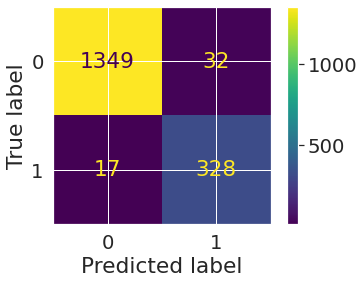

In [ ]:
# Trying polynomial on Random over Sampling
scaler.fit(X_train_ros)
scaler.fit(X_val)
X_train= scaler.transform(X_train_ros)
X_val= scaler.transform(X_val)
clf_R = SVC(kernel='rbf',class_weight='balanced', gamma='scale')
clf_R.fit(X_train_ros, y_train_ros)
y_pred = clf_R.predict(X_val)
print ("RBF Accuracy on Training", clf_R.score(X_train_ros,y_train_ros))
print("RBF Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred),"on Random over Sampled data")
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_R, X_val, y_val)
plt.show()

RBF Accuracy on Training 0.9649068322981367
RBF Accuracy on Validation: 0.9658169177288528 on Random under Sampled data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1381
           1       0.89      0.94      0.92       345

    accuracy                           0.97      1726
   macro avg       0.94      0.96      0.95      1726
weighted avg       0.97      0.97      0.97      1726



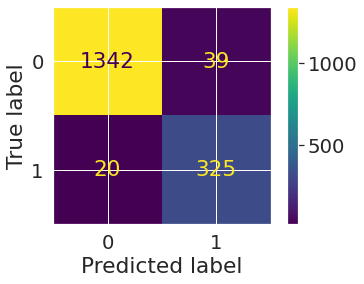

In [ ]:
# Trying polynomial on Random under Sampling
scaler.fit(X_train_rus)
scaler.fit(X_val)
X_train= scaler.transform(X_train_rus)
X_val= scaler.transform(X_val)
clf_R = SVC(kernel='rbf',class_weight='balanced', gamma='scale')
clf_R.fit(X_train_rus, y_train_rus)
y_pred = clf_R.predict(X_val)
print ("RBF Accuracy on Training", clf_R.score(X_train_rus,y_train_rus))
print("RBF Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred),"on Random under Sampled data")
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_R, X_val, y_val)
plt.show()

<a id='Bagging'></a>
# **Model:** Bagging Classifier

## A: Polynomial kernel

Bagging SVC on Training 0.9655857870542924
Accuracy on Validation: 0.9542294322132098
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1381
           1       0.97      0.80      0.87       345

    accuracy                           0.95      1726
   macro avg       0.96      0.90      0.92      1726
weighted avg       0.95      0.95      0.95      1726



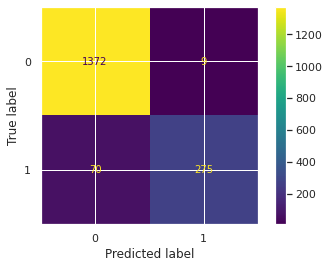

In [ ]:
clf_BP = BaggingClassifier(SVC(kernel='poly', degree=2, probability=True, class_weight='balanced'), max_samples=1.0 , n_estimators=50)
clf_BP.fit(X_train, y_train)
y_pred = clf_BP.predict(X_val)
print ("Bagging SVC on Training", clf_BP.score(X_train,y_train))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_BP, X_val, y_val)
plt.show()

Bagging SVC on Training 0.9668281774133433
Accuracy on Validation: 0.9559675550405562
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1381
           1       0.97      0.81      0.88       345

    accuracy                           0.96      1726
   macro avg       0.96      0.90      0.93      1726
weighted avg       0.96      0.96      0.95      1726



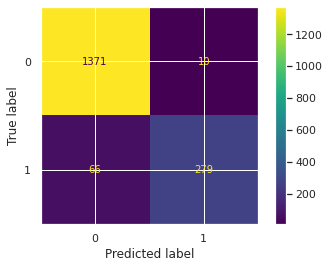

In [ ]:
clf_BP = BaggingClassifier(SVC(kernel='poly', degree=2, probability=True, class_weight='balanced'), max_samples=1.0, n_estimators=100)
clf_BP.fit(X_train, y_train)
y_pred = clf_BP.predict(X_val)
print ("Bagging SVC on Training", clf_BP.score(X_train,y_train))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_BP, X_val, y_val)
plt.show()

Bagging SVC on Training 0.9555055132784593
Accuracy on Validation: 0.9727694090382387
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1381
           1       0.92      0.95      0.93       345

    accuracy                           0.97      1726
   macro avg       0.95      0.96      0.96      1726
weighted avg       0.97      0.97      0.97      1726



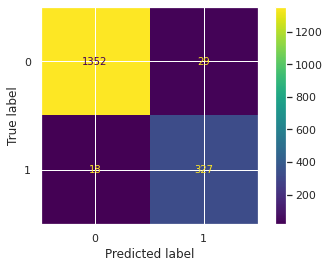

In [ ]:
clf_BP = BaggingClassifier(SVC(kernel='poly', degree=2, probability=True, class_weight='balanced'), max_samples=1.0, n_estimators=100)
clf_BP.fit(X_train_sm, y_train_sm)
y_pred = clf_BP.predict(X_val)
print ("Bagging SVC on Training", clf_BP.score(X_train_sm,y_train_sm))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_BP, X_val, y_val)
plt.show()

## B: RBF kernel

Bagging SVC Accuracy on Training 0.9822338178655734
Accuracy on Validation: 0.9681344148319815
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1381
           1       0.93      0.90      0.92       345

    accuracy                           0.97      1726
   macro avg       0.96      0.94      0.95      1726
weighted avg       0.97      0.97      0.97      1726



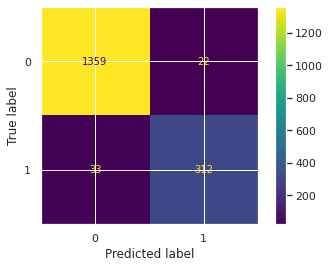

In [ ]:
clf_BR = BaggingClassifier(SVC(kernel='rbf', probability=True, class_weight='balanced'), max_samples=1.0, n_estimators=50)
clf_BR.fit(X_train, y_train)
y_pred = clf_BR.predict(X_val)
print ("Bagging SVC Accuracy on Training", clf_BR.score(X_train,y_train))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_BR, X_val, y_val)
plt.show()

Bagging SVC 0.9813641446142378
Accuracy on Validation: 0.9675550405561993
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1381
           1       0.93      0.90      0.92       345

    accuracy                           0.97      1726
   macro avg       0.95      0.94      0.95      1726
weighted avg       0.97      0.97      0.97      1726



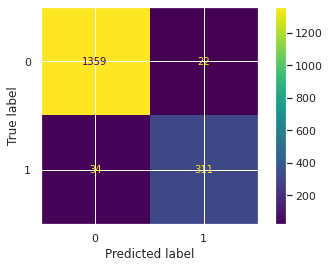

In [ ]:
clf_BR = BaggingClassifier(SVC(kernel='rbf', probability=True, class_weight='balanced'), max_samples=1.0, n_estimators=100)
clf_BR.fit(X_train, y_train)
y_pred = clf_BR.predict(X_val)
print ("Bagging SVC", clf_BR.score(X_train,y_train))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_BR, X_val, y_val)
plt.show()

Bagging SVC 0.970725267898742
Accuracy on Validation: 0.9698725376593279
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1381
           1       0.89      0.97      0.93       345

    accuracy                           0.97      1726
   macro avg       0.94      0.97      0.95      1726
weighted avg       0.97      0.97      0.97      1726



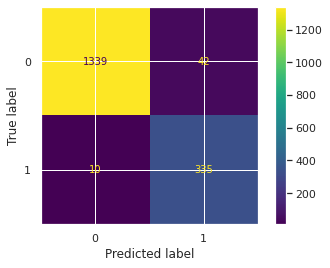

In [ ]:
clf_BR = BaggingClassifier(SVC(kernel='rbf', probability=True, class_weight='balanced'), max_samples=1.0, n_estimators=100)
clf_BR.fit(X_train_sm, y_train_sm)
y_pred = clf_BR.predict(X_val)
print ("Bagging SVC", clf_BR.score(X_train_sm,y_train_sm))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_BR, X_val, y_val)
plt.show()

<a id='Random'></a>
# **Model:** Random Forest Classifier 

Accuracy on Training 0.978630885824326
Accuracy on Validation: 0.9652375434530707
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1381
           1       0.93      0.89      0.91       345

    accuracy                           0.97      1726
   macro avg       0.95      0.94      0.94      1726
weighted avg       0.96      0.97      0.96      1726



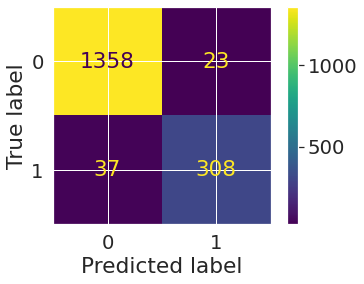

In [ ]:
clf_F = RandomForestClassifier(min_samples_leaf=20)
clf_F.fit(X_train, y_train)
y_pred = clf_F.predict(X_val)
print ("Accuracy on Training", clf_F.score(X_train,y_train))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_F, X_val, y_val)
plt.show()

Accuracy on Training 0.9865821841222512
Accuracy on Validation: 0.9692931633835458
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1381
           1       0.93      0.91      0.92       345

    accuracy                           0.97      1726
   macro avg       0.96      0.95      0.95      1726
weighted avg       0.97      0.97      0.97      1726



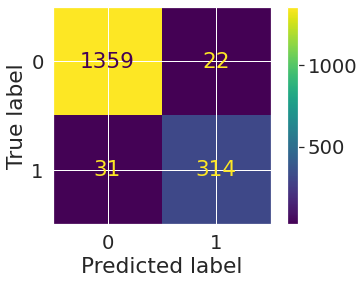

In [ ]:
clf_F = RandomForestClassifier(min_samples_leaf=10)
clf_F.fit(X_train, y_train)
y_pred = clf_F.predict(X_val)
print ("Accuracy on Training", clf_F.score(X_train,y_train))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_F, X_val, y_val)
plt.show()

Accuracy on Training 0.9942850043483663
Accuracy on Validation: 0.9721900347624566
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1381
           1       0.94      0.92      0.93       345

    accuracy                           0.97      1726
   macro avg       0.96      0.95      0.96      1726
weighted avg       0.97      0.97      0.97      1726



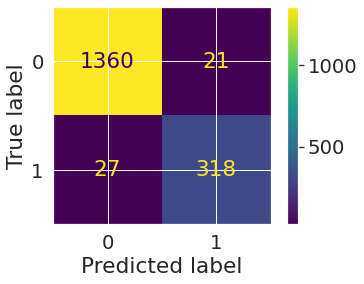

In [ ]:
clf_F = RandomForestClassifier(min_samples_leaf=5)
clf_F.fit(X_train, y_train)
y_pred = clf_F.predict(X_val)
print ("Accuracy on Training", clf_F.score(X_train,y_train))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_F, X_val, y_val)
plt.show()

Accuracy on Training 1.0
Accuracy on Validation: 0.9733487833140209
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1381
           1       0.93      0.93      0.93       345

    accuracy                           0.97      1726
   macro avg       0.96      0.96      0.96      1726
weighted avg       0.97      0.97      0.97      1726



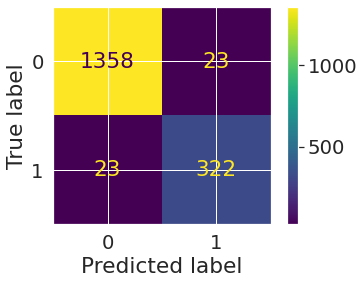

In [ ]:
#min_samples_leaf=1,criterion='gini'
clf_F = RandomForestClassifier()
clf_F.fit(X_train, y_train)
y_pred = clf_F.predict(X_val)
print ("Accuracy on Training", clf_F.score(X_train,y_train))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_F, X_val, y_val)
plt.show()

Accuracy on Training 1.0
Accuracy on Validation: 0.9716106604866744
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.96      0.89      0.93       345

    accuracy                           0.97      1726
   macro avg       0.97      0.94      0.95      1726
weighted avg       0.97      0.97      0.97      1726



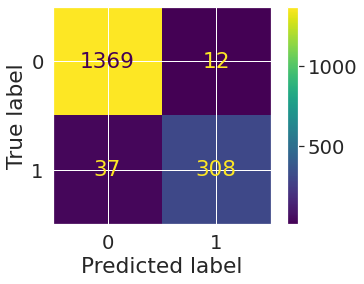

In [ ]:
#min_samples_leaf=1 
clf_F = RandomForestClassifier(criterion='entropy')
clf_F.fit(X_train, y_train)
y_pred = clf_F.predict(X_val)
print ("Accuracy on Training", clf_F.score(X_train,y_train))
print("Accuracy on Validation:",sklearn.metrics.accuracy_score(y_val, y_pred))
print (classification_report(y_true=y_val, y_pred=y_pred))
plot_confusion_matrix(clf_F, X_val, y_val)
plt.show()

## **Error analysis and possible improvements**

The data was imblanaced therefore, we tried SMOTE, Random Over Sampling and Random Under Sampling, but the results were very close to the original data and in some case orginal data was giving better results.  



*   For the **Logistic Regression Classifier** the main improvments were driven by hyperparameter tuning we tried different values for the parameters in order to get good results.
*   For **SVM** we tried different degrees polynomial in order to find the best degree and then we found out that the RBF kernal gives us better accuracy. The same happened while using the bagging for SVM polynomial and RBF kernal. 


*   For **Random Forest Classifier**, the accuracy rates were satisfying although we tried to prune the trees by limiting the number of samples at the leaf to avoid overfitting but that wasn't the case with the model was giving high accuracy on validation. Furthermore, Gini index gave us better results than the Entropy.


<a id='Testing'></a>
# **Testing**

In [ ]:
#merging the training validation into one 
X_train_val_merge = np.vstack([X_train, X_val]) 
y_train_val_merge =  pd.concat([pd.DataFrame(y_train),pd.DataFrame( y_val)],axis=0)

## Logistic Regression

For LR, The Accuracy is: 0.9553623188405798
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1380
           1       0.98      0.80      0.88       345

    accuracy                           0.96      1725
   macro avg       0.96      0.90      0.92      1725
weighted avg       0.96      0.96      0.95      1725



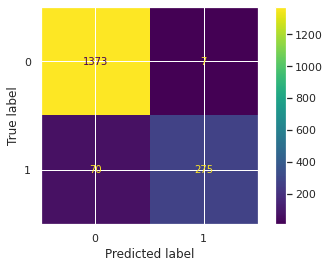

In [ ]:
# apply PolynomialFeatures
X_train_poly = poly.fit_transform(X_train_val_merge) 
X_test_poly = poly.fit_transform(X_test)

#Scale the data 
scaler = StandardScaler()
scaler.fit(X_train_poly)

X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

#Make Predictions
y_pred_on_test = LR_clf.predict(X_test_poly)

#Performance
print("For LR, The Accuracy is:",sklearn.metrics.accuracy_score(y_test, y_pred_on_test))
print(classification_report(y_true=y_test, y_pred=y_pred_on_test))
plot_confusion_matrix(LR_clf, X_test_poly, y_test)
plt.show()

##RBF Kernel 

 For RBF kernal, The Accuracy is: 0.975072463768116
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1380
           1       0.91      0.97      0.94       345

    accuracy                           0.98      1725
   macro avg       0.95      0.97      0.96      1725
weighted avg       0.98      0.98      0.98      1725



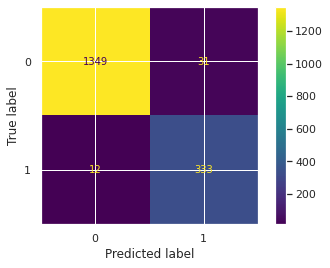

In [ ]:
scaler.fit(X_train_val_merge)
scaler.fit(X_test)
X_train_val_merge= scaler.transform(X_train_val_merge)
X_test= scaler.transform(X_test)
clf_R = SVC(kernel='rbf',class_weight='balanced', gamma='scale')
clf_R.fit(X_train_val_merge, y_train_val_merge)
y_pred = clf_R.predict(X_test)
print(" For RBF kernal, The Accuracy is:",sklearn.metrics.accuracy_score(y_test, y_pred))
print (classification_report(y_true=y_test, y_pred=y_pred))
plot_confusion_matrix(clf_R, X_test, y_test)
plt.show()

## Bagging

 For Bagging using RBF kernal, The Accuracy is: 0.9698550724637681
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1380
           1       0.95      0.90      0.92       345

    accuracy                           0.97      1725
   macro avg       0.96      0.94      0.95      1725
weighted avg       0.97      0.97      0.97      1725



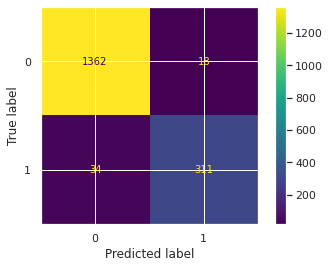

In [ ]:
clf_BR = BaggingClassifier(SVC(kernel='rbf', probability=True, class_weight='balanced'), max_samples=1.0, n_estimators=100)
clf_BR.fit(X_train_val_merge, y_train_val_merge)
y_pred = clf_BR.predict(X_test)
print(" For Bagging using RBF kernal, The Accuracy is:",sklearn.metrics.accuracy_score(y_test, y_pred))
print (classification_report(y_true=y_test, y_pred=y_pred))
plot_confusion_matrix(clf_BR, X_test, y_test)
plt.show()

## Random Forest Classifier

 The Accuracy is: 0.976231884057971
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1380
           1       0.96      0.92      0.94       345

    accuracy                           0.98      1725
   macro avg       0.97      0.96      0.96      1725
weighted avg       0.98      0.98      0.98      1725



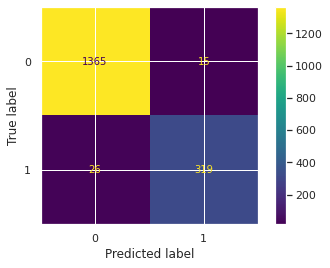

In [ ]:
clf_F = RandomForestClassifier()
clf_F.fit(X_train_val_merge, y_train_val_merge)
y_pred = clf_F.predict(X_test)
print(" The Accuracy is:",sklearn.metrics.accuracy_score(y_test, y_pred))
print (classification_report(y_true=y_test, y_pred=y_pred))
plot_confusion_matrix(clf_F, X_test, y_test)
plt.show()

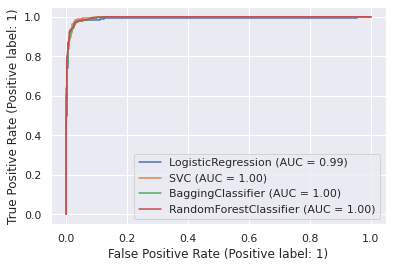

In [ ]:
display= plot_roc_curve(LR_clf, X_test_poly, y_test)
plot_roc_curve(clf_R,X_test,y_test,ax=display.ax_)
plot_roc_curve(clf_BR,X_test,y_test,ax=display.ax_)
plot_roc_curve(clf_F,X_test,y_test,ax=display.ax_)

# **Conclusion** 

The objective of this project is to accurately predict Epileptic Seizures Using EEG Signals measured for different people. The original dataset contained 11,500 samples, 178 EEG features and 5 classes. Upon further investigations, it has been decided to handle the dataset as binary classification problem with y = {0: non-Seizures class, 1: Seizures class}. 
Furthermore, transforming into binary classes resulted into imbalanced dataset {0: 9200, 1:2300}, in order to tackle this issue, 3 different methods were explored to handle the variation in dataset size including SMOTE Oversampling, Random Oversampling and Random Under-sampling. All the three methods were used during the training phase and the performance on the training data was measured to ensure adequate model training. 
Upon pre-processing the data, four learning Algorithms were used as follows:
1. Logistic Regression 
2. SVM 
3. Baggaing 
4. Random Forest

The models/classifiers resulted from those algorithms were trained on the training set, then with proper hyperparameters tuning, they were tested on the Validation sets. All needed performance measures were calculated for each experiment separately, then the best combination of above was used to predict on the Testing set in the last section of this notebook. 

Classifiers Results:
All four classifiers yield high level of Accuracy (Between 96 – 98), and great Precision, Recall and F1-Score (Between 90 – 98) each of which was presented in details under “Testing” section. 


<a id='Ref'></a>
#References

Dataset Source: Qiuyi Wu-School of Mathematical Sciences-Rochester Institute of Technology
ResearchGate,2021(https://www.researchgate.net/figure/Sketch-of-how-to-record-an-Electroencephalogram-An-EEG-allows-measuring-the-electrical_fig1_338423585)